# Price Prediction - Advanced Regression

In [1]:
# Importing Required Libraries for the Project
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import power_transform
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor

Reading the data,
Train data set has 1460 rows and 81 columns including the output column("Sale Price").
Test dataset has 1459 rows and 80 columns excluding the "Sale Price" column, which I need to predict with my model.

In [2]:
test = pd.read_csv('test-Copy1.csv')
train = pd.read_csv('train.csv')
Y = pd.read_csv('sample_submission-Copy1.csv',index_col = 'Id')
Y = Y.to_numpy().flatten()

In [3]:
dataset = train.copy()
del dataset['SalePrice']

Here I have concatinated the Train and Test dataset for fiting the data, taking care of the empty(null) values and also sorting the data in categorical and numerical format for encoding it respectively.

In [4]:
dataset = pd.concat([dataset,test])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
dataset = dataset.drop(['Alley','MiscFeature','PoolQC','Fence','Id'],axis=1)
# here the 5 columns are removed from the data set as they have more than 50% null values and the 'Id' column is removed because 
# it does not provide any usefull information for the prediction.

Here, the remaining columns with the missing data are filled with the values having the highest frequency (MODE) and numerical
data is filled with their respective mean values using the .mode()[0] and .mean() functions of pandas.

In [7]:
dataset['MSZoning']=dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
dataset['LotFrontage']=dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['Utilities']=dataset['Utilities'].fillna(dataset['Utilities'].mode()[0])
dataset['Exterior1st']=dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd']=dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
dataset['MasVnrType']=dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['BsmtQual']=dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['BsmtCond']=dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtExposure']=dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType1']=dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['BsmtFinSF1']=dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mode()[0])
dataset['BsmtFinType2']=dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['BsmtFinSF2']=dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].mode()[0])
dataset['BsmtUnfSF']=dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mode()[0])
dataset['FireplaceQu']=dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['GarageType']=dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset['GarageArea']=dataset['GarageArea'].fillna(dataset['GarageArea'].mode()[0])
dataset['GarageQual']=dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
# dataset['MSZoning'].mode()[0] #printed the mode of column 'MSZoning' just for reference.
dataset['TotalBsmtSF']=dataset['TotalBsmtSF'].fillna(dataset['TotalBsmtSF'].mean())
dataset['Electrical']=dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['BsmtFullBath']=dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].mode()[0])
dataset['BsmtHalfBath']=dataset['BsmtHalfBath'].fillna(dataset['BsmtHalfBath'].mode()[0])
dataset['KitchenQual']=dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['Functional']=dataset['Functional'].fillna(dataset['Functional'].mode()[0])
dataset['GarageYrBlt']=dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mode()[0])
dataset['GarageFinish']=dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageCars']=dataset['GarageCars'].fillna(dataset['GarageCars'].mode()[0])
dataset['GarageCond']=dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
dataset['SaleType']=dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

Still there are some columns containing 1 or 2 null values so for the sake of simplicity I have dropped them and then the dataset won't have any null values and it's ready further changes.

In [8]:
dataset_encode = pd.get_dummies(dataset.select_dtypes(include = object))
data_num = (dataset.select_dtypes(exclude = object))
train_encode = pd.get_dummies(train.select_dtypes(include=object))
train = pd.concat([train.select_dtypes(exclude=object),train_encode],axis=1)

In [9]:
encoded_data_all = pd.concat([data_num,dataset_encode],axis=1)
encoded_data_train = encoded_data_all.head(1460).to_numpy()
y = train['SalePrice'].to_numpy()
print(encoded_data_all.shape)

(2919, 275)


In [10]:
dataset_corr = encoded_data_all[['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'ExterQual_Gd',
       'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt', 'BsmtFinSF1',
       'SaleType_New', 'SaleCondition_Partial', 'LotFrontage',
       'FireplaceQu_Gd', 'GarageType_Attchd', 'MasVnrType_Stone',
       'Neighborhood_NoRidge', 'WoodDeckSF', 'KitchenQual_Gd', '2ndFlrSF',
       'OpenPorchSF', 'BsmtExposure_Gd', 'Exterior2nd_VinylSd',
       'Exterior1st_VinylSd', 'HalfBath', 'GarageCond_TA', 'LotArea',
       'FireplaceQu_Ex', 'CentralAir_Y', 'GarageQual_TA', 'MSZoning_RL',
       'HouseStyle_2Story', 'Electrical_SBrkr', 'RoofStyle_Hip',
       'GarageType_BuiltIn', 'BsmtQual_Gd', 'PavedDrive_Y',
       'BsmtFullBath', 'LotShape_IR1', 'Neighborhood_StoneBr',
       'BsmtUnfSF', 'MasVnrType_BrkFace', 'GarageFinish_RFn',
       'RoofMatl_WdShngl', 'BedroomAbvGr', 'FireplaceQu_TA', 
       'LotConfig_CulDSac', 'Neighborhood_Somerst', 'BldgType_1Fam',
       'BsmtExposure_Av', 'Exterior1st_CemntBd', 'Exterior2nd_CmentBd',
       'Neighborhood_Timber', 'LotShape_IR2', 'LandContour_HLS',
       'BsmtFinType2_Unf', 'Functional_Typ', 'Condition1_Norm',
       'ScreenPorch', 'ExterCond_TA', 'BsmtCond_TA', 
       'LandContour_Bnk', 'Neighborhood_BrDale', 'BsmtFinType1_ALQ',
       'RoofMatl_CompShg', 'Condition1_Artery', 'Exterior1st_AsbShng',
       'MSZoning_C (all)', 'Neighborhood_MeadowV', 'BldgType_Duplex',
       'ExterQual_Fa', 'Condition1_Feedr', 'SaleCondition_Abnorml',
       'Foundation_Slab', 'Electrical_FuseF', 'Neighborhood_Sawyer',
       'EnclosedPorch', 'BsmtQual_Fa', 'GarageCond_Fa', 'BsmtCond_Fa',
       'BsmtFinType1_BLQ', 'GarageQual_Fa', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'BsmtFinType1_Rec', 'KitchenAbvGr', 'ExterCond_Fa',
        'Neighborhood_BrkSide',
       'SaleCondition_Normal', 'KitchenQual_Fa', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_MetalSd', 'HouseStyle_1.5Fin',
       'Neighborhood_IDOTRR', 'Exterior1st_MetalSd',
       'Neighborhood_Edwards', 'Neighborhood_NAmes',
       'Neighborhood_OldTown', 'Electrical_FuseA', 'Foundation_BrkTil',
       'PavedDrive_N', 'RoofStyle_Gable', 'SaleType_WD', 'CentralAir_N',
       'BsmtExposure_No', 'LotShape_Reg', 'MSZoning_RM', 'HeatingQC_TA',
       'Foundation_CBlock', 'GarageType_Detchd', 'MasVnrType_None',
       'GarageFinish_Unf', 'BsmtQual_TA', 'KitchenQual_TA',
       'ExterQual_TA']]

In [11]:
X_train_corr = dataset_corr.to_numpy()[0:1460,:]
X_test_corr = dataset_corr.to_numpy()[1460:2920,:]


Finding out the skewness of the dataset and arranging them in increasing order this shows that the features PoolArea, LotArea,MiscVal e.t.c are highly skewed so we need to normalize the data to reduce the skewness.

In [12]:
data_num.skew().sort_values(ascending=False)

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
MasVnrArea        2.612892
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.646420
1stFlrSF          1.470360
BsmtFinSF1        1.425963
MSSubClass        1.376165
GrLivArea         1.270010
TotalBsmtSF       1.163082
BsmtUnfSF         0.919812
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.625153
OverallCond       0.570605
BedroomAbvGr      0.326492
GarageArea        0.239380
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
GarageCars       -0.218705
YearRemodAdd     -0.451252
GarageYrBlt      -0.468752
YearBuilt        -0.600114
dtype: float64

Here, I have simply removed the some features which were having high skewness after normalization and also I have done some feature engineering and created more polynomial features using sklearn Polynommial Features.

In [13]:
data_num_normalized = preprocessing.normalize(data_num, norm='l2')
poly = PolynomialFeatures(degree=2)
poly_data = poly.fit_transform(data_num)
data_polynum_normalized = preprocessing.normalize(poly_data, norm='l2')
data_num_normalized = power_transform(data_num_normalized)
data_polynum_normalized = power_transform(data_polynum_normalized)
data_num_normalized = pd.DataFrame(data_num_normalized,columns = data_num.columns)
del data_num_normalized['PoolArea']
del data_num_normalized['3SsnPorch']
del data_num_normalized['LowQualFinSF']
del data_num_normalized['MiscVal']
del data_num_normalized['BsmtHalfBath']
del data_num_normalized['ScreenPorch']
del data_num_normalized['BsmtFinSF2']
del data_num_normalized['EnclosedPorch']
del data_num_normalized['MasVnrArea']
del data_num_normalized['HalfBath']
del data_num_normalized['MSSubClass']
del data_num_normalized['BsmtFullBath']

In [14]:
data_num_normalized.skew().sort_values(ascending = False)

OpenPorchSF     0.468136
2ndFlrSF        0.447361
WoodDeckSF      0.445368
Fireplaces      0.260348
BsmtFinSF1      0.179877
BsmtUnfSF       0.135416
MoSold          0.040066
FullBath        0.006043
GrLivArea      -0.001342
OverallCond    -0.002678
GarageArea     -0.002872
GarageCars     -0.019147
TotalBsmtSF    -0.019389
1stFlrSF       -0.026019
KitchenAbvGr   -0.047042
OverallQual    -0.048381
TotRmsAbvGrd   -0.052196
YrSold         -0.064499
YearRemodAdd   -0.067109
GarageYrBlt    -0.068547
BedroomAbvGr   -0.070911
YearBuilt      -0.071562
LotFrontage    -0.095518
LotArea        -0.311755
dtype: float64

Finally, first we are going to train Linear Model with regularization and then see the results plotted with the training set and cross validation set for obtaining insights of the performance of the model, We have also created another Linear Model with varing the regularisation parameter and obtained '20' results for each value of the corresponding parameter.

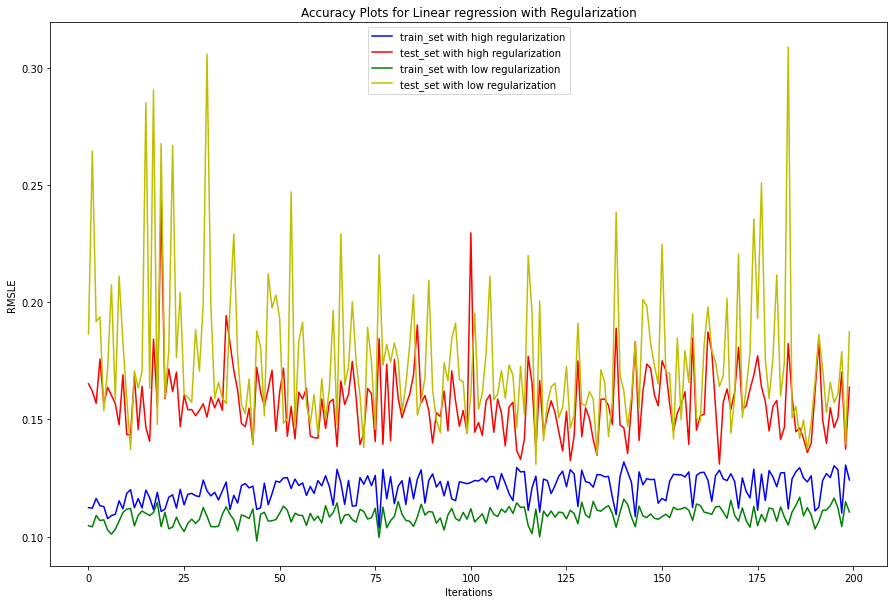

In [19]:
train_predict_RMSLE1 = []
test_predict_RMSLE1 = []
train_predict_RMSLE2 = []
test_predict_RMSLE2 = []
for j in range(10):
    for i in range(20):
        reg1 = linear_model.Ridge(alpha=1 +j)
        reg2 = linear_model.Ridge(alpha=0.05 + 0.05*j)
        X_train, X_test, y_train, y_test = train_test_split(encoded_data_all.head(1460), y)
        reg1.fit(X_train, y_train)
        reg2.fit(X_train, y_train)
        yhat_train1 = np.absolute(reg1.predict(X_train))
        yhat_test1 = np.absolute(reg1.predict(X_test))
        yhat_train2 = np.absolute(reg2.predict(X_train))
        yhat_test2 = np.absolute(reg2.predict(X_test))
        train_predict_RMSLE1.append(math.sqrt(MSLE(y_train, np.absolute(reg1.predict(X_train)))))
        test_predict_RMSLE1.append(math.sqrt(MSLE(y_test, np.absolute(reg1.predict(X_test)))))
        train_predict_RMSLE2.append(math.sqrt(MSLE(y_train, np.absolute(reg2.predict(X_train)))))
        test_predict_RMSLE2.append(math.sqrt(MSLE(y_test, np.absolute(reg2.predict(X_test)))))
plt.figure(figsize=(15,10))
plt.plot(np.arange(200),train_predict_RMSLE1,label = 'train_set with high regularization',c = 'b')
plt.plot(np.arange(200),test_predict_RMSLE1,label = 'test_set with high regularization',c = 'r')
plt.plot(np.arange(200),train_predict_RMSLE2,label = 'train_set with low regularization',c = 'g')
plt.plot(np.arange(200),test_predict_RMSLE2,label = 'test_set with low regularization',c = 'y')
plt.ylabel("RMSLE")
plt.xlabel("Iterations")
plt.title("Accuracy Plots for Linear regression with Regularization")
plt.legend()
plt.show()

In this cell I have used another model i.e. Random Forest Regressor for predicting the 'SalePrice' and have done it with two different dataset one is normalized dataset containing only the numerical values and with reduced skewness and another is the complete dataset with the categorical values "OneHot Encoded". You can the results below!!!

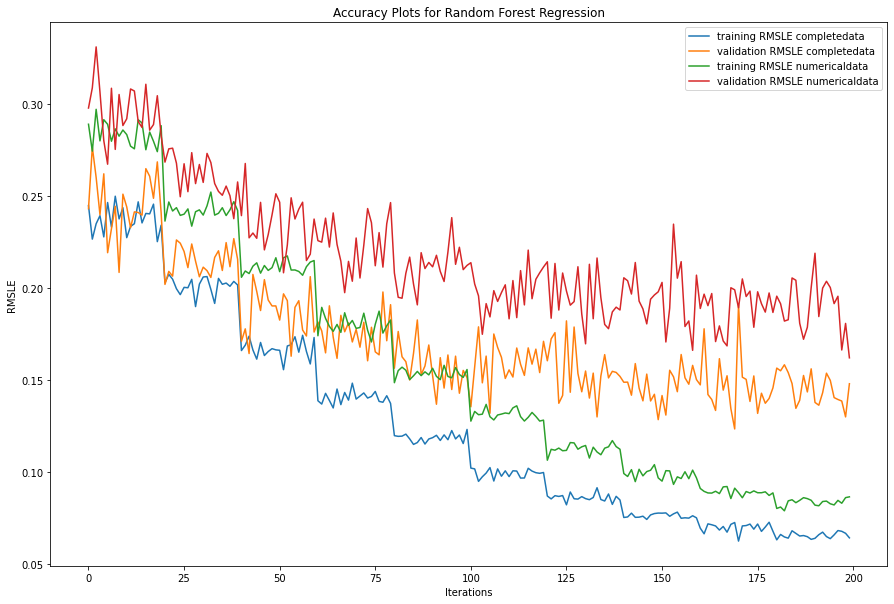

In [23]:
training_rmsle_completedata = []
valid_rmsle_completedata = []
training_rmsle_numericaldata = []
valid_rmsle_numericaldata = [] 
for j in range(10):
    for i in range(20):
        X2_train, X2_valid, y2_train, y2_valid = train_test_split(data_num_normalized.head(1460), y)
        model = RandomForestRegressor(n_estimators=50+10*j, max_depth=2+j, n_jobs=-1) 
        model.fit(X2_train, y2_train)
        training_rmsle_numericaldata.append(math.sqrt(MSLE(y2_train, model.predict(X2_train))))
        valid_rmsle_numericaldata.append(math.sqrt(MSLE(y2_valid, model.predict(X2_valid))))

for j in range(10):
    for i in range(20):
        X1_train, X1_valid, y1_train, y1_valid = train_test_split(encoded_data_all.head(1460), y)
        model = RandomForestRegressor(n_estimators=50+10*j, max_depth=2+j, n_jobs=-1)
        model.fit(X1_train, y1_train) 
        training_rmsle_completedata.append(math.sqrt(MSLE(y1_train, model.predict(X1_train))))
        valid_rmsle_completedata.append(math.sqrt(MSLE(y1_valid, model.predict(X1_valid))))
plt.figure(figsize=(15,10))
plt.plot(np.arange(200), training_rmsle_completedata, label='training RMSLE completedata')
plt.plot(np.arange(200), valid_rmsle_completedata, label='validation RMSLE completedata')
plt.plot(np.arange(200), training_rmsle_numericaldata, label='training RMSLE numericaldata')
plt.plot(np.arange(200), valid_rmsle_numericaldata, label='validation RMSLE numericaldata')
plt.ylabel("RMSLE")
plt.xlabel("Iterations")
plt.title("Accuracy Plots for Random Forest Regression")
plt.legend()
plt.show()


As you can see at the beginning the model underfits the dataset and in the last iterations it has overfit it, we can find the best values of hyperparameters for this model during the iterations (60:80).This model also shows that the dataset with all features including categorical values have performed better than the set with only numerical values.

In [ ]:
model.fit(encoded_data_all.tail(1460), y)
preds = np.absolute(model.predict(encoded_data_all.tail(1459)))

# Save to CSV file
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': preds})
output.to_csv('submission.csv', index=False)